Installing Seaborn

In [ ]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


Importing Modules and Classes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz               
from sklearn.metrics import accuracy_score, confusion_matrix                        
import statsmodels.api as sn                                           
from sklearn import model_selection                                                              
import statsmodels.api as sm
np.random.seed(123) 
pd.options.mode.chained_assignment = None

Reading CSV dataset

In [ ]:
data = pd.read_csv("/content/Merge.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1328 non-null   int64  
 1   sex      1328 non-null   int64  
 2   cp       1328 non-null   int64  
 3   restbps  1328 non-null   int64  
 4   chol     1328 non-null   int64  
 5   fbs      1328 non-null   int64  
 6   restecg  1328 non-null   int64  
 7   maxhra   1328 non-null   int64  
 8   exang    1328 non-null   int64  
 9   oldpeak  1328 non-null   float64
 10  slope    1328 non-null   int64  
 11  ca       1328 non-null   int64  
 12  thal     1328 non-null   int64  
 13  target   1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 145.4 KB


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

In [ ]:
for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])


age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
restbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
maxhra:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Size of Dataset

In [ ]:
data.shape

(1328, 14)

Explore Data Analysis

1    691
0    637
Name: target, dtype: int64


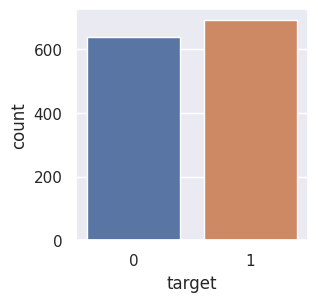

In [ ]:
y = data["target"]
sns.set(rc={'figure.figsize':(3,3)})
sns.countplot(y)

target_temp = data.target.value_counts()

print(target_temp)

In [ ]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Splitting Data into Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression

#Initialize Logistic Regression Classifier
lr = LogisticRegression(random_state = 142)

# Fit classifier to training data
lr.fit(X_train,Y_train)

# Make predictions on testing data
Y_pred_lr = lr.predict(X_test)

# Calculate accuracy of classifier
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

# Calculate confusion matrix of the classifier
cm = confusion_matrix(Y_test, Y_pred_lr)

# Print the performance metrics of the LR model on the testing data
print("LOGISTIC REGRESSION ALGORITHM")
print("The accuracy score achieved is: {:.2f}%".format(score_lr))
print("Confusion Matrix: \n",cm)

LOGISTIC REGRESSION ALGORITHM
The accuracy score achieved is: 83.46%
Confusion Matrix: 
 [[ 95  32]
 [ 12 127]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Initialize Naive Bayes Classifier
nb = GaussianNB()

# Fit classifier to training data
nb.fit(X_train,Y_train)

# Make predictions on testing data
Y_pred_nb = nb.predict(X_test)

# Calculate confusion matrix of the classifier
cm = confusion_matrix(Y_test, Y_pred_nb)

# Calculate accuracy of classifier
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

# Print the performance metrics of the NB model on the testing data
print("NAIVE BAYES ALGORITHM")
print("The accuracy score achieved is: "+str(score_nb)+" %")
print("Confusion Matrix: \n",cm)

NAIVE BAYES ALGORITHM
The accuracy score achieved is: 82.71 %
Confusion Matrix: 
 [[ 95  32]
 [ 14 125]]


K Nearest Neighbor Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize K Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Fit classifier to training data
knn.fit(X_train,Y_train)

# Make predictions on testing data
Y_pred_knn=knn.predict(X_test)

# Calculate confusion matrix of the classifier
cm = confusion_matrix(Y_test, Y_pred_knn)

# Calculate accuracy of classifier
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

# Print the performance metrics of the KNN model on the testing data
print("K NEAREST NEIGHBORS ALGORITHM")
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
print("Confusion Matrix: \n",cm)

K NEAREST NEIGHBORS ALGORITHM
The accuracy score achieved using KNN is: 77.07 %
Confusion Matrix: 
 [[ 99  28]
 [ 33 106]]


Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
  #Initialize Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=x)

    # Fit classifier to training data
    dt.fit(X_train,Y_train)

    # Make predictions on testing data
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

# Calculate confusion matrix of the classifier
cm = confusion_matrix(Y_test, Y_pred_dt)

# Calculate accuracy of classifier
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

# Print the performance metrics of the DT model on the testing data
print("DESCISION TREE")
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
print("Confusion Matrix: \n",cm)

DESCISION TREE
The accuracy score achieved using Decision Tree is: 100.0 %
Confusion Matrix: 
 [[127   0]
 [  0 139]]


Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Fit classifier to training data
rf.fit(X_train, Y_train)

# Make predictions on testing data
Y_pred_rf = rf.predict(X_test)

# Calculate confusion matrix of the classifier
cm = confusion_matrix(Y_test, Y_pred_rf)

# Calculate accuracy of classifier
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

# Print the performance metrics of the RF model on the testing data
print("RANDOM FOREST ALGORITHM")
print('The accuracy score achieved using Random Forest is: {:.2f}%'.format(score_rf))
print("Confusion Matrix: \n",cm)

RANDOM FOREST ALGORITHM
The accuracy score achieved using Random Forest is: 100.00%
Confusion Matrix: 
 [[127   0]
 [  0 139]]


Support Vector Machine Algorithm

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm = SVC()

# Fit classifier to training data
svm.fit(X_train, Y_train)

# Make predictions on testing data
Y_pred_svm = svm.predict(X_test)

# Calculate confusion matrix of the classifier
cm = confusion_matrix(Y_test, Y_pred_svm)

# Calculate accuracy of classifier
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

# Print the performance metrics of the SVM model on the testing data
print("SUPPORT VECTOR MACHINE ALGORITHM")
print("The accuracy score achieved using Decision Tree is: "+str(score_svm)+" %")
print("Confusion Matrix: \n",cm)

SUPPORT VECTOR MACHINE ALGORITHM
The accuracy score achieved using Decision Tree is: 71.05 %
Confusion Matrix: 
 [[ 76  51]
 [ 26 113]]



Printing Accuracies of All Algorithms

In [ ]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf,score_svm]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest","Support Vector Machine"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.46 %
The accuracy score achieved using Naive Bayes is: 82.71 %
The accuracy score achieved using K-Nearest Neighbors is: 77.07 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using Support Vector Machine is: 71.05 %


Graph

<Axes: title={'center': 'Performance Analysis of Machine Learning Algorithms'}, xlabel='Algorithms', ylabel='Accuracy score'>

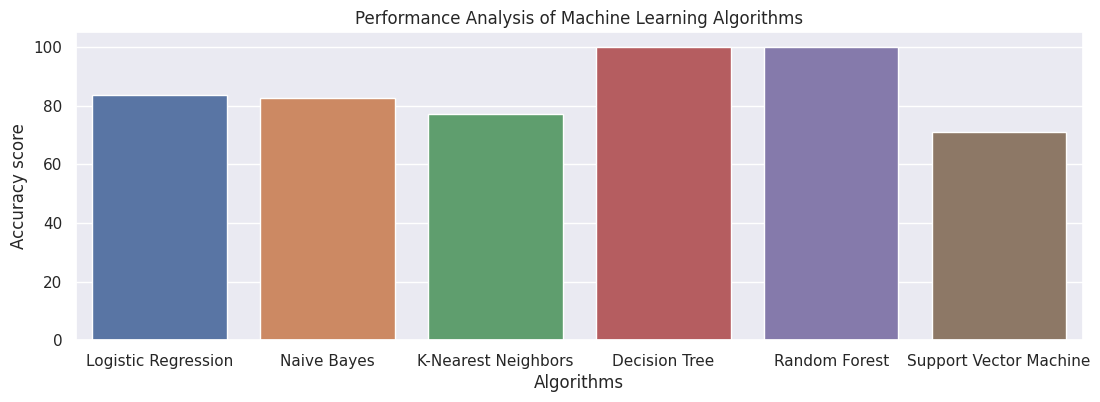

In [ ]:
sns.set(rc={'figure.figsize':(13,4)})
plt.title("Performance Analysis of Machine Learning Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)